In [131]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

sp = pdr.get_data_yahoo('^GSPC', '2011-04-18')
kospi = pdr.get_data_yahoo('^KS11', '2011-04-18')

import pandas as pd
df = pd.DataFrame({'SP500':sp['Close'], 'KOSPI':kospi['Close']})
df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,SP500,KOSPI
Date,,
2011-04-18,1305.140015,2137.719971
2011-04-19,1312.619995,2122.679932
2011-04-20,1330.359985,2169.909912
2011-04-21,1337.380005,2198.540039
2011-04-22,NaN,2197.820068


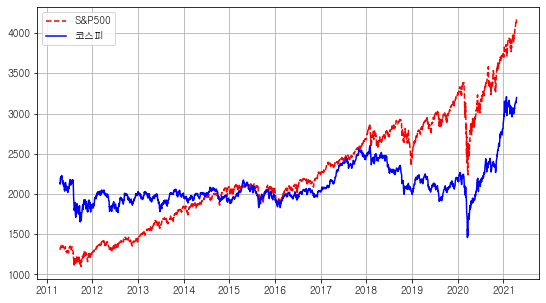

In [125]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

##########한글폰트 적용
path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

plt.figure(figsize=(9,5))
plt.plot(sp.index, sp.Close, 'r--', label='S&P500')
plt.plot(kospi.index, kospi.Close, 'b', label='코스피')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [132]:
df=df.fillna(method='bfill')
df=df.fillna(method='ffill')
df

,SP500,KOSPI
Date,,
2011-04-18,1305.140015,2137.719971
2011-04-19,1312.619995,2122.679932
2011-04-20,1330.359985,2169.909912
2011-04-21,1337.380005,2198.540039
2011-04-22,1335.250000,2197.820068
...,...,...
2021-04-12,4127.990234,3135.590088
2021-04-13,4141.589844,3169.080078
2021-04-14,4124.660156,3182.379883


In [129]:
# pip install scipy
from scipy import stats
regr = stats.linregress(df['SP500'],df['KOSPI'])

print(regr)
df.corr()

LinregressResult(slope=0.2742121041412654, intercept=1496.2925614260196, rvalue=0.7312518350850619, pvalue=0.0, stderr=0.005026972439733248, intercept_stderr=11.793819743912223)


,SP500,KOSPI
SP500,1.000000,0.731252
KOSPI,0.731252,1.000000


In [117]:
r_value = df['SP500'].corr(df['KOSPI'])
r_squared = r_value ** 2
print('결정계수:',r_squared)

결정계수: 0.5347292463152706


In [130]:
regr = stats.linregress(df.SP500,df.KOSPI)
regr_line = f'KOSPI = {regr.slope:.2f} * S&P + {regr.intercept:.2f}'
regr.slope

0.2742121041412654

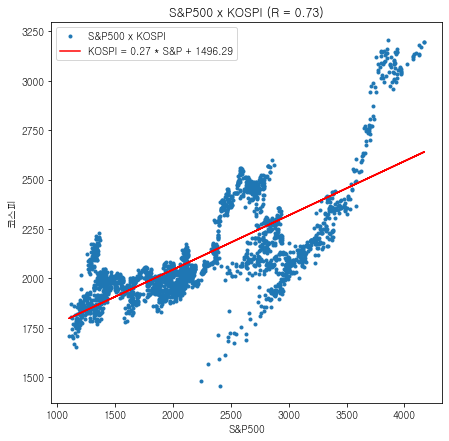

In [120]:
plt.figure(figsize=(7,7))

plt.plot(df.SP500, df.KOSPI, '.')
plt.plot(df.SP500, regr.slope * df.SP500 + regr.intercept, 'r')

plt.legend(['S&P500 x KOSPI', regr_line])
plt.title(f'S&P500 x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('S&P500')
plt.ylabel('코스피')
plt.show()

# 미국 장기국채 금리 상승 영향

In [91]:
tlt = pdr.get_data_yahoo('TLT', '2002-07-30')
kospi = pdr.get_data_yahoo('^KS11', '2002-07-30')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


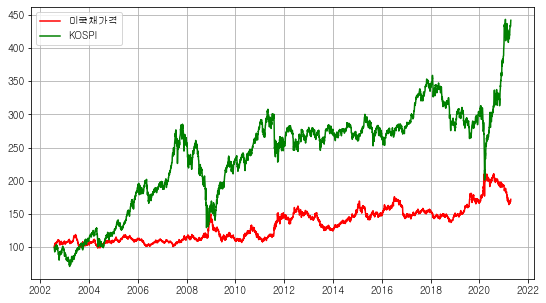

In [92]:
d = (tlt.Close / tlt.Close.loc['2002-07-30'])*100
c = (kospi.Close / kospi.Close.loc['2002-07-30'])*100

plt.figure(figsize=(9,5))
plt.plot(d.index, d, 'r', label='미국채가격')
plt.plot(c.index, c, 'g', label='KOSPI')


plt.grid(True)
plt.legend(loc='best')
plt.show()

In [56]:
df = pd.DataFrame({'X':tlt['Close'], 'Y':kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

In [62]:
regr = stats.linregress(df.X, df.Y)
regr.slope

18.253690402635677

In [61]:
regr_line = f'Y = {regr.slope:2f}  X + {regr.intercept:2f}'

18.253690402635677

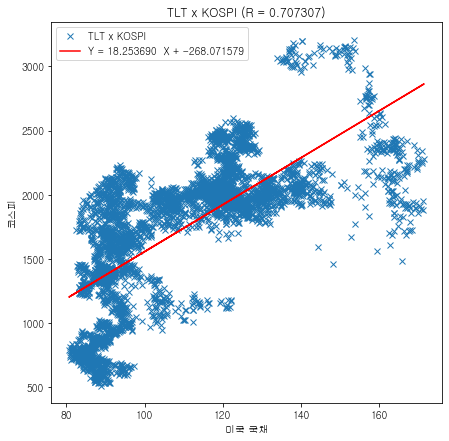

In [58]:
plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, 'x') 
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')

plt.legend(['TLT x KOSPI', regr_line])
plt.title(f'TLT x KOSPI (R = {regr.rvalue:2f})')
plt.xlabel('미국 국채')
plt.ylabel('코스피')
plt.show()

# 미국채금리상승 ~ 국채가격하락, 주식하락

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

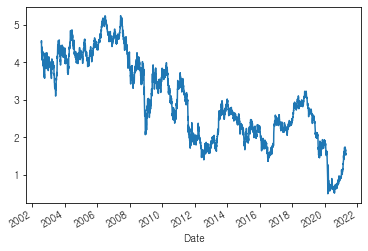

In [73]:
# 미국채권금리
TNX = pdr.get_data_yahoo('^TNX', '2002-07-30')
TNX['Close'].plot()

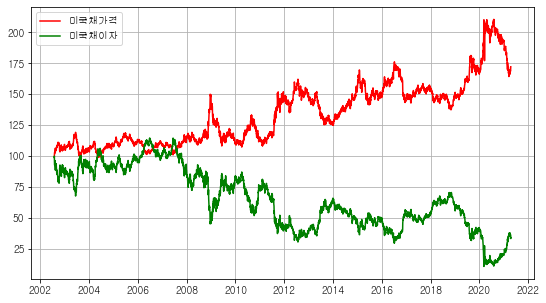

In [80]:
d = (tlt.Close / tlt.Close.loc['2002-07-30'])*100
c = (TNX.Close / TNX.Close.loc['2002-07-30'])*100

plt.figure(figsize=(9,5))
plt.plot(d.index, d, 'r', label='미국채가격')
plt.plot(c.index, c, 'g', label='미국채이자')


plt.grid(True)
plt.legend(loc='best')
plt.show()

In [78]:
dow2 = pdr.get_data_yahoo('^GSPC', '2002-07-30')
dow2 = dow2.fillna(method='bfill')
dow2 = dow2.fillna(method='ffill')

[*********************100%***********************]  1 of 1 completed


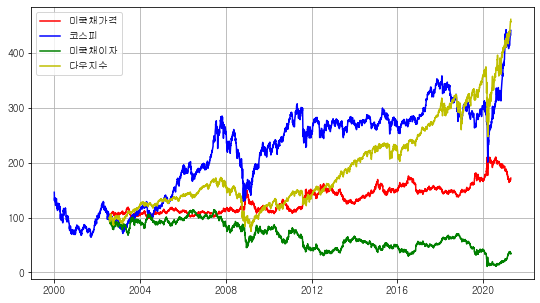

In [79]:
d = (tlt.Close / tlt.Close.loc['2002-07-30'])*100
k = (kospi.Close / kospi.Close.loc['2002-07-30'])*100
c = (TNX.Close / TNX.Close.loc['2002-07-30'])*100
j = (dow2.Close / dow2.Close.loc['2002-07-30'])*100

plt.figure(figsize=(9,5))
plt.plot(d.index, d, 'r', label='미국채가격')
plt.plot(k.index, k, 'b', label='코스피')
plt.plot(c.index, c, 'g', label='미국채이자')
plt.plot(j.index, j, 'y', label='다우지수')

plt.grid(True)
plt.legend(loc='best')
plt.show()

In [87]:
sp2 = pdr.get_data_yahoo('^GSPC', '2020-01-01')
kospi2 = pdr.get_data_yahoo('^KS11', '2020-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


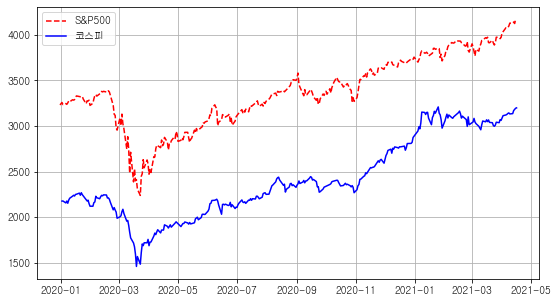

In [89]:

plt.figure(figsize=(9,5))
plt.plot(sp2.index, sp2.Close, 'r--', label='S&P500')
plt.plot(kospi2.index, kospi2.Close, 'b', label='코스피')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [ ]:
aa